In [1]:
import numpy as np
from scipy import ndimage
import scipy.io
from skimage import data
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import imageio
import cv2

In [2]:
Im = np.zeros((512,192,120))

for i in range(120):
    mat = scipy.io.loadmat('/home/stein/UFABC/Processamento Imagens Medicas/Projeto/Pis_0252_001342/Fisica_Projotimizacoes-1/pos_twist_05iso_37/I_%04d.mat'%(i+1))
    Im[:,:,i] = mat["I"]

FileNotFoundError: [Errno 2] No such file or directory: '/home/stein/UFABC/Processamento Imagens Medicas/Projeto/Pis_0252_001342/Fisica_Projotimizacoes-1/pos_twist_05iso_37/I_0001.mat'

In [ ]:
fig, axs = plt.subplots(12,10)
fig.set_size_inches(16,48)
fig.suptitle('Imagens Rato')

for i in range(12):
    for j in range(10):   
        axs[i,j].imshow(Im[:,:,(i*10+j)], cmap='gray')
        axs[i,j].set_title('Slice %d' %(10*i+j))
        axs[i,j].axis('off')
        if(10*i+j)==119:
            break


(-0.5, 191.5, 511.5, -0.5)

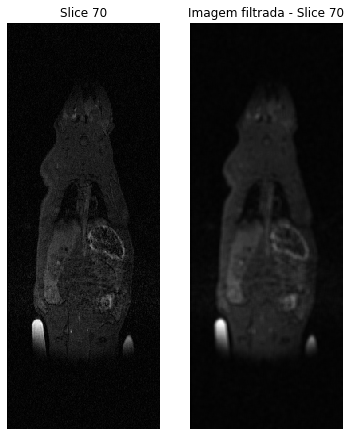

In [243]:
slice = 70

w = np.ones([5,5])/25

Im_filter = ndimage.convolve(Im[:,:,slice],w, mode='reflect')

fig, axs = plt.subplots(1,2)
fig.set_size_inches(6,16)

axs[0].imshow(Im[:,:,slice], cmap='gray')
axs[0].set_title("Slice %d"% slice)
axs[0].axis('off')

axs[1].imshow(Im_filter, cmap='gray')
axs[1].set_title("Imagem filtrada - Slice %d"% slice)
axs[1].axis('off')




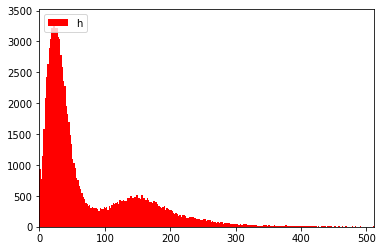

(-0.5, 191.5, 511.5, -0.5)

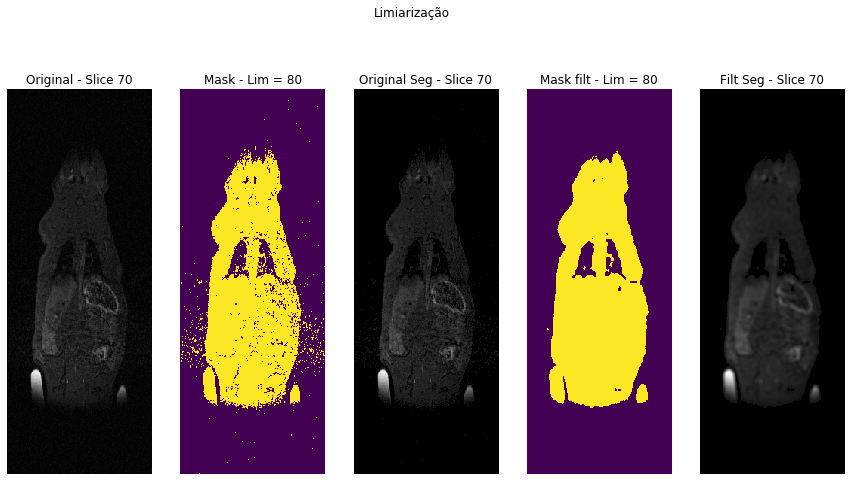

In [244]:
hist,bins = np.histogram(Im[:,:,slice].flatten(),256,[0,512])
plt.hist(Im[:,:,slice].flatten(),256,[0,512], color = 'r')
plt.xlim([0,512])
plt.legend(('histogram'), loc = 'upper left')
plt.show()


fig, axs = plt.subplots(1,5)
fig.set_size_inches(15,8)
fig.suptitle('Limiarização')

axs[0].imshow(Im[:,:,slice], cmap='gray')
axs[0].set_title('Original - Slice %d' %slice)
axs[0].axis('off')

lim = 80

mask = np.where(Im[:,:,slice]>lim,1,0)

axs[1].imshow(mask)
axs[1].set_title('Mask - Lim = %d' %lim)
axs[1].axis('off')

imlim = mask*Im[:,:,slice]

axs[2].imshow(imlim, cmap='gray')
axs[2].set_title('Original Seg - Slice %d' %slice)
axs[2].axis('off')

mask = np.where(Im_filter>lim,1,0)

axs[3].imshow(mask)
axs[3].set_title('Mask filt - Lim = %d' %lim)
axs[3].axis('off')

imlim = mask*Im_filter

axs[4].imshow(imlim, cmap='gray')
axs[4].set_title('Filt Seg - Slice %d' %slice)
axs[4].axis('off')